In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

5


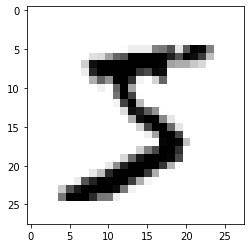

In [3]:
plt.imshow(x_train[0], cmap='binary')
print(y_train[0])

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6740 - accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1257 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0782 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0611 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0425 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.013

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1032 - accuracy: 0.9744


[0.10318205505609512, 0.974399983882904]

In [9]:
finalPred = [out.argmax() for out in model.predict(x_test)]
errors = []
errorCount = 0
errorIndex = 0
size = len(finalPred)
for i in range(0, size):
    if finalPred[i] != y_test[i]:
        errorCount += 1
        errors.append(i)
        errorIndex += 1

In [10]:
if errorCount > 0:
    for i in range(0, 10): # Only prints the first 10 errors, change 10 to change the amount of errors printed
        print(f"Expected: {y_test[errors[i]]}")
        print(f"Prediction: {model.predict(x_test[errors[i]].reshape(1, 28, 28, 1)).argmax()}")

Expected: 4
Prediction: 2
Expected: 9
Prediction: 3
Expected: 8
Prediction: 4
Expected: 2
Prediction: 7
Expected: 5
Prediction: 3
Expected: 4
Prediction: 2
Expected: 6
Prediction: 0
Expected: 8
Prediction: 2
Expected: 4
Prediction: 6
Expected: 1
Prediction: 8
